In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [5]:
data = pd.read_csv('wine-clustering.csv')

In [6]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
data.shape

(178, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [9]:
data.isnull().sum().sort_values(ascending = False)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [10]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


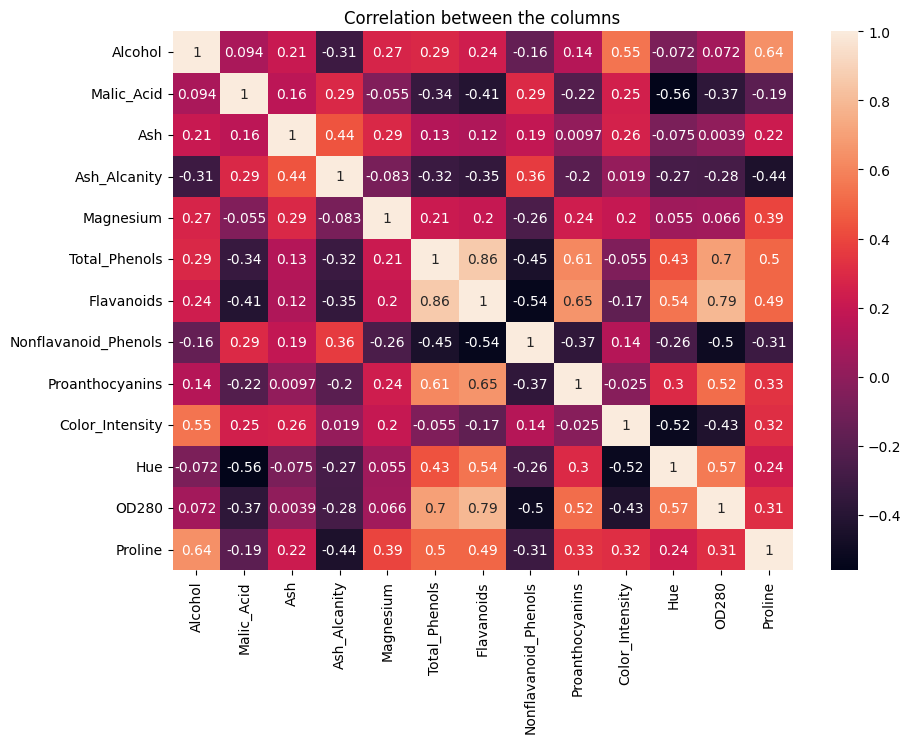

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot = True)
plt.title('Correlation between the columns')
plt.show()

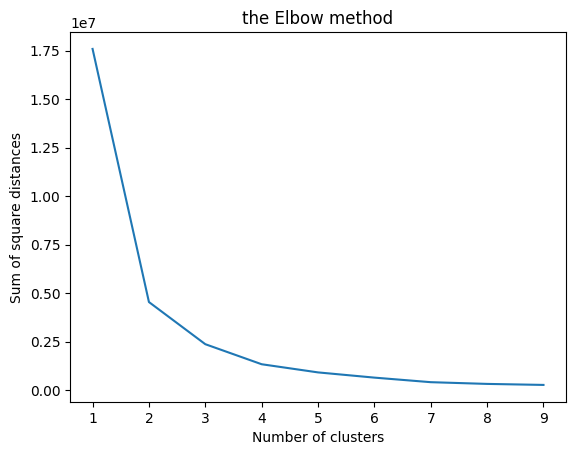

In [12]:
wss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i , init= 'k-means++' , random_state = 42)
  kmeans.fit(data)
  wss.append(kmeans.inertia_)


plt.plot(range(1,10),wss)
plt.title('the Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of square distances')
plt.show()


In [13]:
pip install -U yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<bound method Visualizer.show of KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10),
                 timings=False)>

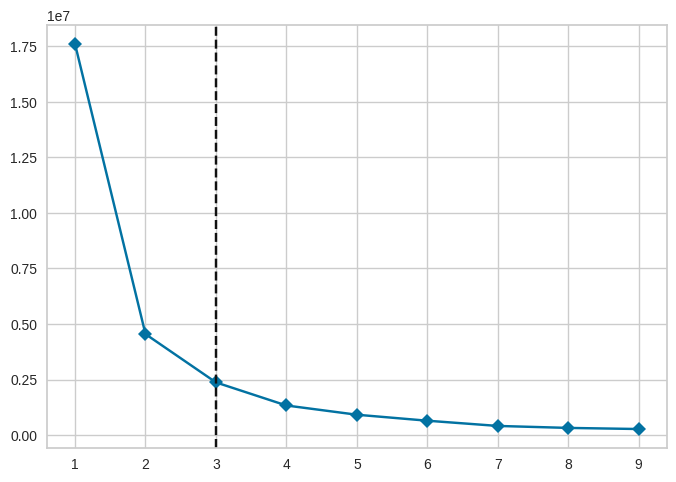

In [14]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10) , timings = False)
visualizer.fit(data)
visualizer.show

In [15]:
for i in range(2, 10):
  kmeans = KMeans(n_clusters = i,max_iter = 100)
  kmeans.fit(data)
  score = silhouette_score(data,kmeans.labels_)
  print('for clustes {} , the slihoutte score is :{}' .format(i,score))

for clustes 2 , the slihoutte score is :0.6568536504294317
for clustes 3 , the slihoutte score is :0.571138193786884
for clustes 4 , the slihoutte score is :0.5620323449580346
for clustes 5 , the slihoutte score is :0.5489993239795681
for clustes 6 , the slihoutte score is :0.5656413100386375
for clustes 7 , the slihoutte score is :0.5583785823444047
for clustes 8 , the slihoutte score is :0.5398971441034123
for clustes 9 , the slihoutte score is :0.5316577207122226


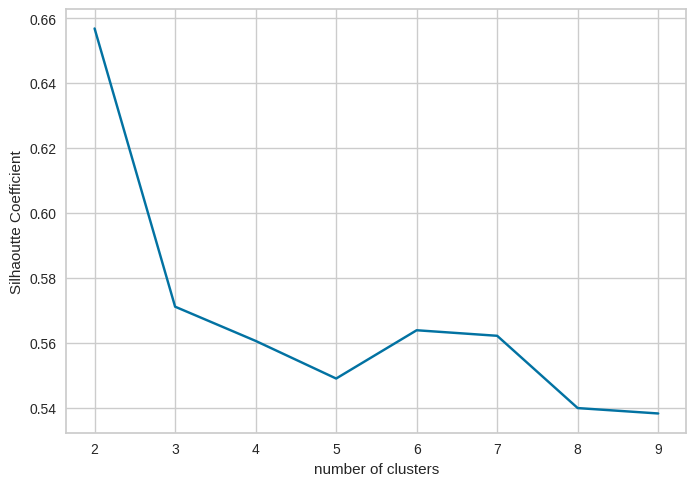

In [16]:
silhoutte_coefficents = []
for i in range(2, 10):
  kmeans = KMeans(n_clusters = i,max_iter = 100)
  kmeans.fit(data)
  score = silhouette_score(data,kmeans.labels_)
  silhoutte_coefficents.append(score)

plt.plot(range(2,10) ,silhoutte_coefficents)
plt.xticks(range(2,10))
plt.xlabel('number of clusters')
plt.ylabel('Silhaoutte Coefficient')
plt.show()

In [17]:
pca = PCA()
x = pca.fit_transform(data)

In [18]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(x)
unique_labels = np.unique(label)

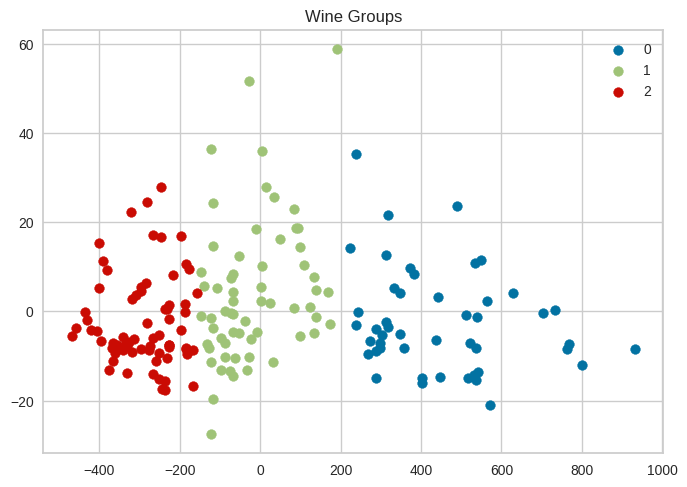

In [19]:
for i in unique_labels:
  plt.scatter(x[label==i,0] , x[label ==i,1] ,label = i)

plt.legend()
plt.title('Wine Groups')
plt.show()